# Project: Phân Loại Yếu Tố Nguy Cơ Của Bệnh Thận Mãn Tính
# Thành viên:
# 21130377 - Nguyễn Cường Huy
# 21130385 - Phạm Hoàng Huy

# Import các thư viện cần thiết

In [ ]:
!pip install imbalanced-learn
!pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from ucimlrepo import fetch_ucirepo
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from prettytable import PrettyTable

# Import Data

In [ ]:
# fetch dataset
risk_factor_prediction_of_chronic_kidney_disease = fetch_ucirepo(id=857)

# data (as pandas dataframes)
X = risk_factor_prediction_of_chronic_kidney_disease.data.features
y = risk_factor_prediction_of_chronic_kidney_disease.data.targets

# metadata
print(risk_factor_prediction_of_chronic_kidney_disease.metadata)

# variable information
print(risk_factor_prediction_of_chronic_kidney_disease.variables)


{'uci_id': 857, 'name': 'Risk Factor Prediction of Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/857/risk+factor+prediction+of+chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/857/data.csv', 'abstract': 'Chronic kidney disease (CKD) is an increasing medical issue that declines the productivity of renal capacities and subsequently damages the kidneys.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 200, 'num_features': 28, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C5WP64', 'creators': ['Md. Ashiqul Islam', 'Shamima Akter'], 'intro_paper': {'ID': 268, 'type': 'NATIVE', 'title': 'Risk Factor Prediction of Chronic Kidney Disease based on Machine L

In [ ]:
replace_dict = {
    "sg": {
        "1.019 - 1.021": 1.020,
        "1.009 - 1.011": 1.010,
        "1.015 - 1.017": 1.016,
        "≥ 1.023": 1.023,
        "< 1.007": 1.007,
    },
    "al": {
        "1-Jan": 1,
        "< 0": 0,
        "≥ 4": 4,
        "3-Mar": 3,
        "2-Feb": 2,
    },
    "su": {
        "< 0": 0,
        "4-Apr": 4,
        "2-Feb": 2,
        "4-Mar": 3,
        "2-Jan": 1,
        "≥ 4": 5,
    },
    "bgr": {
        "< 112": 112,
        "112 - 154": 133,
        "154 - 196": 175,
        "196 - 238": 217,
        "238 - 280": 259,
        "280 - 322": 301,
        "322 - 364": 343,
        "364 - 406": 385,
        "406 - 448": 427,
        "≥ 448": 448,
    },
    "bu": {
        "< 48.1": 48.1,
        "48.1 - 86.2": 67.15,
        "86.2 - 124.3": 105.25,
        "124.3 - 162.4": 143.35,
        "162.4 - 200.5": 181.45,
        "200.5 - 238.6": 219.55,
        "238.6 - 276.7": 257.65,
        "≥ 352.9": 352.9,
    },
    "sod": {
        "< 118": 118,
        "118 - 123": 120.5,
        "123 - 128": 125.5,
        "128 - 133": 130.5,
        "133 - 138": 135.5,
        "138 - 143": 140.5,
        "143 - 148": 145.5,
        "148 - 153": 150.5,
        "≥ 158": 158,
    },
    "sc": {
        "< 3.65": 3.65,
        "3.65 - 6.8": 6.8,
        "6.8 - 9.95": 9.95,
        "9.95 - 13.1": 13.1,
        "13.1 - 16.25": 16.25,
        "16.25 - 19.4": 19.4,
        "≥ 28.85": 28.85,
    },
    "pot": {
        "< 7.31": 7.31,
        "7.31 - 11.72": 11.72,
        "38.18 - 42.59": 38.18,
        "≥ 42.59": 42.59,
    },
    "hemo": {
        "< 6.1": 6.1,
        "6.1 - 7.4": 7,
        "7.4 - 8.7": 8,
        "8.7 - 10": 9,
        "10 - 11.3": 10,
        "11.3 - 12.6": 12,
        "12.6 - 13.9": 13,
        "13.9 - 15.2": 14,
        "15.2 - 16.5": 15,
        "≥ 16.5": 16.5,
    },
    "age": {
        "< 12": 12,
        "20-Dec": 18,
        "20 - 27": 15,
        "27 - 35": 30,
        "35 - 43": 40,
        "43 - 51": 50,
        "51 - 59": 55,
        "59 - 66": 60,
        "66 - 74": 70,
        "≥ 74": 74,
    },
    "grf": {
        "≥ 227.944": 227.944,
        "127.281 - 152.446": 127.281,
        "102.115 - 127.281": 102.115,
        "177.612 - 202.778": 177.612,
        "26.6175 - 51.7832": 26.6175,
        "51.7832 - 76.949": 51.7832,
        "76.949 - 102.115": 76.949,
        "152.446 - 177.612": 152.446,
        "202.778 - 227.944": 202.778,
        "< 26.6175": 26,
        " p ": 0,
    },
    "stage": {
        "s1": 1,
        "s2": 2,
        "s3": 3,
        "s4": 4,
        "s5": 5,
    },
    "rbcc": {
        "2.69 - 3.28": 2.99,
        "3.28 - 3.87": 3.575,
        "3.87 - 4.46": 4.165,
        "4.46 - 5.05": 4.755,
        "5.05 - 5.64": 5.345,
        "5.64 - 6.23": 5.935,
        "6.23 - 6.82": 6.525,
        "≥ 7.41": 7.41,
        "< 2.69": 2.5,
    },
    "wbcc": {
        "< 4980": 4980,
        "4980 - 7360": 6170,
        "7360 - 9740": 8550,
        "9740 - 12120": 10430,
        "12120 - 14500": 13310,
        "14500 - 16880": 15690,
        "16880 - 19260": 18070,
        "19260 - 21640": 20450,
        "≥ 24020": 24020,
    }
}



for column, mapping in replace_dict.items():
    if column in X.columns:
        X[column] = X[column].replace(mapping)

y = y.replace({'ckd': 1, 'notckd': 0})

<ipython-input-132-cb4aa225aa9b>:144: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].replace(mapping)
<ipython-input-132-cb4aa225aa9b>:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].replace(mapping)
<ipython-input-132-cb4aa225aa9b>:146: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('fu

In [ ]:
print("X shape:", X.shape)
print("Sample features (X):")
print(X.head())


print("\nY shape:", y.shape)
print("Sample target (y):")
print(y.head())

X shape: (200, 28)
Sample features (X):
   bp (Diastolic)  bp limit     sg  al  rbc  su  pc  pcc  ba  bgr  ...  htn  \
0               0         0  1.020   1    0   0   0    0   0  112  ...    0   
1               0         0  1.010   0    0   0   0    0   0  133  ...    0   
2               0         0  1.010   4    1   0   1    0   1  112  ...    0   
3               1         1  1.010   3    0   0   0    0   0  133  ...    0   
4               0         0  1.016   0    0   0   0    0   0  175  ...    0   

   dm  cad  appet  pe ane      grf  stage  affected  age  
0   0    0      0   0   0  227.944      1         1   12  
1   0    0      0   0   0  227.944      1         1   12  
2   0    0      1   0   0  127.281      1         1   12  
3   0    0      0   0   0  127.281      1         1   12  
4   1    0      1   1   0  127.281      1         1   18  

[5 rows x 28 columns]

Y shape: (200, 1)
Sample target (y):
   class
0      1
1      1
2      1
3      1
4      1


In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=[np.number]).columns

print("\nCategorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)


Categorical columns: Index(['pcv'], dtype='object')
Numeric columns: Index(['bp (Diastolic)', 'bp limit', 'sg', 'al', 'rbc', 'su', 'pc', 'pcc',
       'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'rbcc', 'wbcc', 'htn',
       'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage', 'affected', 'age'],
      dtype='object')


In [ ]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])

numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])

<ipython-input-135-2c8cfbdfb793>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])
<ipython-input-135-2c8cfbdfb793>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])


In [ ]:
for col in categorical_cols:
    encoder = LabelEncoder()
    X[col] = encoder.fit_transform(X[col])

<ipython-input-136-2c01dfe54073>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.fit_transform(X[col])


In [ ]:
print(X.head(10))
print(y.head(6))

   bp (Diastolic)  bp limit     sg   al  rbc   su   pc  pcc   ba    bgr  ...  \
0             0.0       0.0  1.020  1.0  0.0  0.0  0.0  0.0  0.0  112.0  ...   
1             0.0       0.0  1.010  0.0  0.0  0.0  0.0  0.0  0.0  133.0  ...   
2             0.0       0.0  1.010  4.0  1.0  0.0  1.0  0.0  1.0  112.0  ...   
3             1.0       1.0  1.010  3.0  0.0  0.0  0.0  0.0  0.0  133.0  ...   
4             0.0       0.0  1.016  0.0  0.0  0.0  0.0  0.0  0.0  175.0  ...   
5             1.0       1.0  1.023  0.0  0.0  0.0  0.0  0.0  0.0  112.0  ...   
6             0.0       0.0  1.020  3.0  0.0  0.0  0.0  0.0  0.0  112.0  ...   
7             0.0       0.0  1.020  0.0  0.0  0.0  0.0  0.0  0.0  133.0  ...   
8             0.0       0.0  1.023  0.0  0.0  0.0  0.0  0.0  0.0  133.0  ...   
9             1.0       2.0  1.010  4.0  0.0  0.0  1.0  1.0  1.0  112.0  ...   

   htn   dm  cad  appet   pe  ane       grf  stage  affected   age  
0  0.0  0.0  0.0    0.0  0.0  0.0  227.9440    1.0

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['class'] = y_resampled

In [ ]:

desired_samples = 1350

current_samples = len(df_resampled)

if current_samples < desired_samples:
    additional_samples_needed = desired_samples - current_samples

    class_counts = df_resampled['class'].value_counts()
    minority_class = class_counts.idxmin()
    print(f"Thiếu {additional_samples_needed} mẫu. Lớp nhỏ nhất: {minority_class}")

    smote_ratio = {minority_class: class_counts[minority_class] + additional_samples_needed}
    smote = SMOTE(sampling_strategy=smote_ratio, random_state=42)

    try:
        X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)
    except ValueError as e:
        print(f"Không thể tạo thêm mẫu với SMOTE: {e}")
        extra_samples = df_resampled.sample(additional_samples_needed, replace=True, random_state=42)
        df_resampled = pd.concat([df_resampled, extra_samples], ignore_index=True)
    else:
        df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
        df_resampled['class'] = y_resampled

print(f"Tổng số mẫu cuối cùng: {len(df_resampled)}")

Thiếu 1094 mẫu. Lớp nhỏ nhất: 1
Tổng số mẫu cuối cùng: 1350


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=3)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Train target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Train set shape: (945, 28)
Test set shape: (405, 28)
Train target shape: (945, 1)
Test target shape: (405, 1)


# Apply Neurol Network MultilayerPerceptron

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_filepath = 'best_model.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history = model.fit(X_train, y_train, batch_size=256, epochs=60, validation_data=(X_test, y_test), callbacks=[model_checkpoint_callback])

best_model = keras.models.load_model(checkpoint_filepath)

y_pred_probs = best_model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int).flatten()
y_test_classes = y_test.to_numpy()

accuracy_NN = accuracy_score(y_test_classes, y_pred_classes)
precision_NN = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall_NN = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1_NN = f1_score(y_test_classes, y_pred_classes, average='weighted')
fpr_NN, tpr_NN, thresholds_NN = roc_curve(y_test_classes, y_pred_classes, pos_label=1)
roc_auc_NN = auc(fpr_NN, tpr_NN)


score = best_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Accuracy:', accuracy_NN)
print('Precision:', precision_NN)
print('Recall:', recall_NN)
print('F1 Score:', f1_NN)
print("AUC:", roc_auc_NN)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 32)                  │             928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,473 (5.75 KB)

 Trainable params: 1,473 (5.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.2915 - loss: 1113.4130 - val_accuracy: 0.1012 - val_loss: 835.5567
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3502 - loss: 965.5055 - val_accuracy: 0.1012 - val_loss: 542.8469
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4099 - loss: 769.7046 - val_accuracy: 0.1062 - val_loss: 234.0201
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4546 - loss: 572.9254 - val_accuracy: 0.8864 - val_loss: 6.4325
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5300 - loss: 472.6394 - val_accuracy: 0.8988 - val_loss: 31.1315
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6084 - loss: 403.7984 - val_accuracy: 0.8988 - val_loss: 52.1520
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6602 - loss: 306.8199 - val_accuracy: 0.8988 - val_loss: 70.9135
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6911 - loss: 275.6828 - val_accuracy:

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test loss: 31.13153648376465
Test accuracy: 0.8987654447555542
Accuracy: 0.8987654320987655
Precision: 0.8077793019356806
Recall: 0.8987654320987655
F1 Score: 0.8508468589959705
AUC: 0.5


# Apply Logictic Regression

In [ ]:
logreg = LogisticRegression(max_iter=500, solver='lbfgs', multi_class='ovr')
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred)
precision_logreg = precision_score(y_test, y_pred, average='weighted')
recall_logreg = recall_score(y_test, y_pred, average='weighted')
f1_logreg = f1_score(y_test, y_pred, average='weighted')

fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred, pos_label=1)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)


print('Logistic Regression:')
print('Accuracy:', accuracy_logreg)
print('Precision:', precision_logreg)
print('Recall:', recall_logreg)
print('F1 Score:', f1_logreg)
print("AUC:", roc_auc_logreg)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression:
Accuracy: 0.9950617283950617
Precision: 0.9950887134857991
Recall: 0.9950617283950617
F1 Score: 0.9950067647556233
AUC: 0.975609756097561


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Apply Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=1000,
                            max_depth=10,
                            min_samples_split=4,
                            min_samples_leaf=2,
                            max_features='sqrt',
                            random_state=1)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average='weighted')
recall_rf = recall_score(y_test, y_pred, average='weighted')
f1_rf = f1_score(y_test, y_pred, average='weighted')

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred, pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)


print('Random Forest:')
print('Accuracy:', accuracy_rf)
print('Precision:', precision_rf)
print('Recall:', recall_rf)
print('F1 Score:', f1_rf)
print("AUC:", roc_auc_rf)

Random Forest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC: 1.0


# Result

In [ ]:
table = PrettyTable()

table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC"]

table.add_row(["Neural Network", f"{accuracy_NN * 100:.4f}%", f"{precision_NN * 100:.4f}%", f"{recall_NN * 100:.4f}%", f"{f1_NN * 100:.4f}%",  f"{roc_auc_NN * 100:.2f}%"])
table.add_row(["Logistic Regression",  f"{accuracy_logreg * 100:.4f}%", f"{precision_logreg * 100:.4f}%", f"{recall_logreg * 100:.4f}%", f"{f1_logreg * 100:.4f}%", f"{roc_auc_logreg * 100:.2f}%"])
table.add_row(["Random Forest", f"{accuracy_rf * 100:.4f}%", f"{precision_rf * 100:.4f}%", f"{recall_rf * 100:.4f}%", f"{f1_rf * 100:.4f}%", f"{roc_auc_rf * 100:.2f}%"])

print(table)

+---------------------+-----------+-----------+-----------+-----------+---------+
|        Model        |  Accuracy | Precision |   Recall  |  F1 Score |   AUC   |
+---------------------+-----------+-----------+-----------+-----------+---------+
|    Neural Network   |  89.8765% |  80.7779% |  89.8765% |  85.0847% |  50.00% |
| Logistic Regression |  99.5062% |  99.5089% |  99.5062% |  99.5007% |  97.56% |
|    Random Forest    | 100.0000% | 100.0000% | 100.0000% | 100.0000% | 100.00% |
+---------------------+-----------+-----------+-----------+-----------+---------+


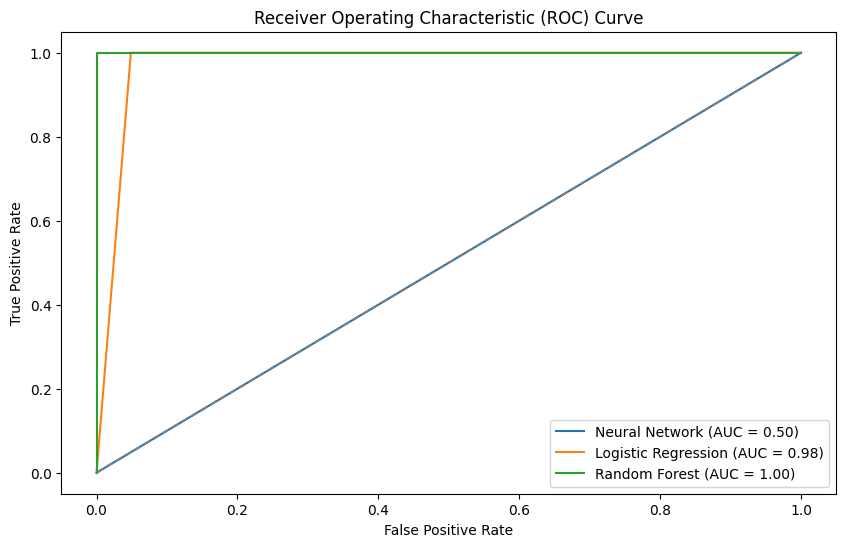

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_NN, tpr_NN, label=f"Neural Network (AUC = {roc_auc_NN:.2f})")
plt.plot(fpr_logreg, tpr_logreg, label=f"Logistic Regression (AUC = {roc_auc_logreg:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()